About Project:-

Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is. The main objective is to predict rating and factors affecting rating

**Importing Libraries**

In [689]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor 







In [690]:


df = pd.read_csv('/content/zomato.csv',nrows=35000)
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Performing EDA**

In [691]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [692]:
df.shape

(35000, 17)

In [693]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          35000 non-null  object
 1   address                      35000 non-null  object
 2   name                         35000 non-null  object
 3   online_order                 35000 non-null  object
 4   book_table                   35000 non-null  object
 5   rate                         29811 non-null  object
 6   votes                        35000 non-null  int64 
 7   phone                        34257 non-null  object
 8   location                     34986 non-null  object
 9   rest_type                    34845 non-null  object
 10  dish_liked                   15927 non-null  object
 11  cuisines                     34971 non-null  object
 12  approx_cost(for two people)  34817 non-null  object
 13  reviews_list                 35

In [694]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            5189
votes                              0
phone                            743
location                          14
rest_type                        155
dish_liked                     19073
cuisines                          29
approx_cost(for two people)      183
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [695]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [696]:
df.drop(['url','address','phone','reviews_list'	],axis=1,inplace=True)

In [697]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


In [698]:
df.shape

(35000, 13)

In [699]:
print(df.duplicated().sum())

65


In [700]:
df.drop_duplicates(inplace=True)

In [701]:
df.shape

(34935, 13)

**Cleaning Rate column**

In [702]:
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            5179
votes                              0
location                          14
rest_type                        155
dish_liked                     19033
cuisines                          29
approx_cost(for two people)      182
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [703]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5'], dtype=object)

In [704]:
df['rate']=df['rate'].replace("NEW",np.nan)
df['rate']=df['rate'].replace('nan',np.nan)

In [705]:
df['rate'] = df['rate'].astype(str).apply(lambda x:x.replace('/5',''))
df['rate']=df['rate'].replace('-',np.nan)

In [706]:
df['rate']=df['rate'].astype('float')
df['rate'].dtypes

dtype('float64')

In [707]:
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

**Filling null values in rate column by mean**

In [708]:
df['rate']=df['rate'].fillna(df['rate'].mean())

In [709]:
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                          14
rest_type                        155
dish_liked                     19033
cuisines                          29
approx_cost(for two people)      182
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

**Renaming of columns**

In [710]:
df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)

In [711]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


In [712]:
df['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [713]:
df['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block'], dtype=object)

**Cleaning cost column**

In [714]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300'], dtype=object)

In [715]:
df['cost']=df['cost'].astype('str').apply(lambda x:x.replace(',',''))
df['cost']=df['cost'].replace('nan',np.nan)

In [716]:
df['cost']=df['cost'].astype('float')

In [717]:
df['cost']=df['cost'].fillna(df['cost'].mean())

In [718]:

df['cost'].dtypes

dtype('float64')

In [719]:
df['cost'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost, dtype: float64

In [720]:
df.isna().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location           14
rest_type         155
dish_liked      19033
cuisines           29
cost                0
menu_item           0
type                0
city                0
dtype: int64

In [721]:
df['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ..., 'Coffee, Cappuccino, Burgers, Garlic Bread, Sandwich',
       'Cappuccino, Fish, Burgers, Pizza, Coffee, White Sauce Pasta, Fries',
       'Waffles, Pancakes, Iced Coffee, Yoghurt Shake, Belgian Chocolate Waffle, Faluda'],
      dtype=object)

In [722]:
df['dish_liked']=df['dish_liked'].replace('nan',np.nan)

In [723]:
df['dish_liked']=df['dish_liked'].fillna('not liked any dish')

In [724]:
df['dish_liked'].isna().sum()

0

In [725]:
df.dropna(inplace=True)

**cleaning rest_type**

In [726]:
df['rest_type'].value_counts()

Quick Bites                   13049
Casual Dining                  6989
Cafe                           2701
Delivery                       1854
Dessert Parlor                 1512
                              ...  
Bhojanalya                        1
Sweet Shop, Dessert Parlor        1
Dessert Parlor, Kiosk             1
Quick Bites, Kiosk                1
Bakery, Food Court                1
Name: rest_type, Length: 90, dtype: int64

In [727]:
rest_type=df['rest_type'].value_counts(ascending=False)

In [728]:
rest_type_lessthan200=rest_type[rest_type<200]
rest_type_lessthan200

Bakery, Quick Bites           197
Casual Dining, Cafe           195
Pub                           193
Mess                          173
Pub, Casual Dining            161
                             ... 
Bhojanalya                      1
Sweet Shop, Dessert Parlor      1
Dessert Parlor, Kiosk           1
Quick Bites, Kiosk              1
Bakery, Food Court              1
Name: rest_type, Length: 75, dtype: int64

In [729]:
df.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
menu_item        object
type             object
city             object
dtype: object

In [730]:
lst=list(df['rest_type'])

new_list=[]

for i in lst:
  if lst.count(i)<5:
    i='others'
    

  else:
    i=i

  new_list.append(i)

# print('new list',new_list)

df['rest_type']=new_list
df['rest_type']





0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
34995            Quick Bites
34996            Quick Bites
34997            Quick Bites
34998         Dessert Parlor
34999            Quick Bites
Name: rest_type, Length: 34765, dtype: object

In [731]:
df['rest_type'].value_counts()


Quick Bites                   13049
Casual Dining                  6989
Cafe                           2701
Delivery                       1854
Dessert Parlor                 1512
                              ...  
Bar, Cafe                         6
Casual Dining, Lounge             6
Fine Dining, Lounge               6
Bar, Pub                          5
Food Court, Dessert Parlor        5
Name: rest_type, Length: 75, dtype: int64

In [732]:
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
menu_item       0
type            0
city            0
dtype: int64

**Cleaning Cuisines column**

In [733]:
df['cuisines'].value_counts()

North Indian                                                         1945
North Indian, Chinese                                                1635
South Indian                                                         1143
Bakery, Desserts                                                      643
Biryani                                                               602
                                                                     ... 
Bengali, Seafood, Oriya, North Indian, Biryani                          1
North Indian, Fast Food, Biryani, Beverages                             1
Biryani, South Indian, Chinese, North Indian, Arabian, Hyderabadi       1
Continental, Healthy Food, Beverages                                    1
Chinese, Mangalorean                                                    1
Name: cuisines, Length: 2352, dtype: int64

In [734]:
cuisines=df['cuisines'].value_counts(ascending=False)
cuisines

North Indian                                                         1945
North Indian, Chinese                                                1635
South Indian                                                         1143
Bakery, Desserts                                                      643
Biryani                                                               602
                                                                     ... 
Bengali, Seafood, Oriya, North Indian, Biryani                          1
North Indian, Fast Food, Biryani, Beverages                             1
Biryani, South Indian, Chinese, North Indian, Arabian, Hyderabadi       1
Continental, Healthy Food, Beverages                                    1
Chinese, Mangalorean                                                    1
Name: cuisines, Length: 2352, dtype: int64

In [735]:
lstt=list(df['cuisines'])

new_listt=[]

for i in lstt:
  if lstt.count(i)<5:
    i='others'
    

  else:
    i=i

  new_listt.append(i)

# print('new list',new_listt)

df['cuisines']=new_listt
df['cuisines']

0             North Indian, Mughlai, Chinese
1                Chinese, North Indian, Thai
2                     Cafe, Mexican, Italian
3                 South Indian, North Indian
4                   North Indian, Rajasthani
                        ...                 
34995               Biryani, Andhra, Chinese
34996                      Burger, Fast Food
34997                  South Indian, Chinese
34998                    Desserts, Beverages
34999    South Indian, North Indian, Chinese
Name: cuisines, Length: 34765, dtype: object

In [736]:
df['cuisines'].value_counts()

others                                                      2742
North Indian                                                1945
North Indian, Chinese                                       1635
South Indian                                                1143
Bakery, Desserts                                             643
                                                            ... 
Burger, Cafe, Pizza, Fast Food                                 5
South Indian, North Indian, Chinese, Juices, Ice Cream         5
Healthy Food, Pizza, Italian, South Indian, North Indian       5
Arabian, Sandwich, Rolls, Burger                               5
North Indian, Fast Food, Kebab, Rolls, Beverages               5
Name: cuisines, Length: 1232, dtype: int64

In [737]:
df['type'].value_counts()

Delivery              18047
Dine-out              11496
Desserts               2364
Cafes                  1252
Drinks & nightlife      630
Buffet                  571
Pubs and bars           405
Name: type, dtype: int64

In [738]:
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
menu_item       0
type            0
city            0
dtype: int64

In [739]:
df['city'].value_counts()

BTM                      3252
Koramangala 5th Block    2819
Koramangala 4th Block    2767
Koramangala 6th Block    2613
Jayanagar                2360
JP Nagar                 2078
Indiranagar              1848
Church Street            1809
Brigade Road             1766
HSR                      1733
Bannerghatta Road        1602
Brookefield              1497
Kammanahalli             1314
Kalyan Nagar             1295
Basavanagudi             1265
Electronic City          1217
Bellandur                1212
Frazer Town              1184
Banashankari              859
Koramangala 7th Block     275
Name: city, dtype: int64

**Data Visualization**

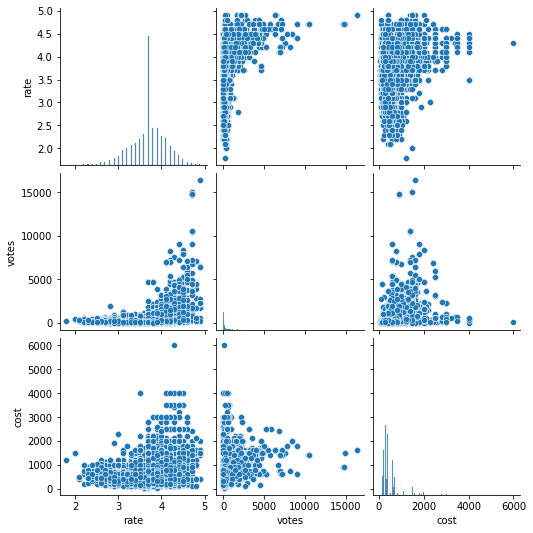

In [740]:
sns.pairplot(df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


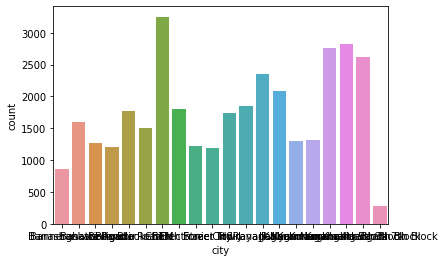

In [741]:
sns.countplot('city',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


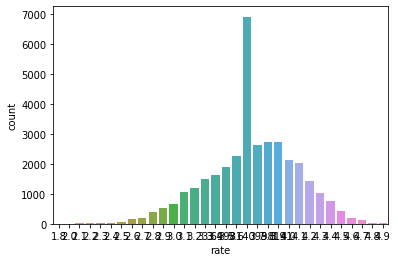

In [742]:

sns.countplot('rate',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


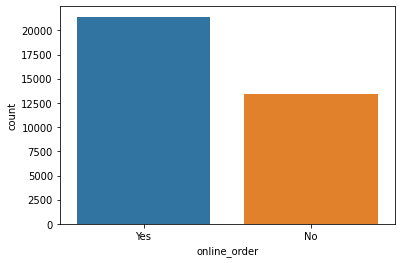

In [743]:
sns.countplot('online_order',data=df)

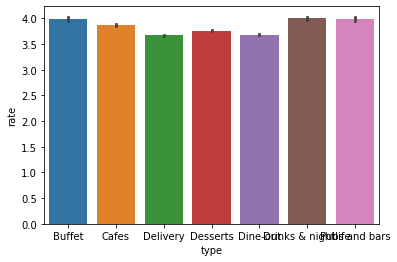

In [744]:
sns.barplot(x='type',y='rate',data=df)

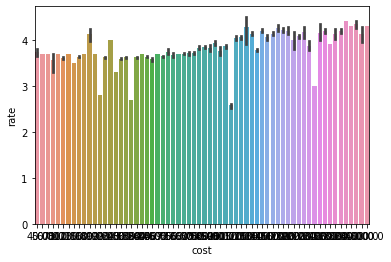

In [745]:
sns.barplot(x='cost',y='rate',data=df)

In [746]:
df.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
menu_item        object
type             object
city             object
dtype: object

In [747]:
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
menu_item       0
type            0
city            0
dtype: int64

In [748]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'menu_item', 'type',
       'city'],
      dtype='object')

In [749]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari


In [750]:
#label Encoding
lst=['name','rest_type','online_order','menu_item','city','location','dish_liked','type','book_table','cuisines']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in lst:
  df[i]=le.fit_transform(df[i])

df





,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,3052,1,1,4.1,775,1,22,2812,1002,800.0,6290,0,1
1,5789,1,0,4.1,787,1,22,2277,438,800.0,6290,0,1
2,5367,1,0,3.8,918,1,18,1071,360,800.0,6290,0,1
3,171,0,0,3.7,88,1,63,2131,1161,300.0,6290,0,1
4,2455,0,0,3.8,166,4,22,2658,1013,600.0,6290,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,4517,1,0,3.4,16,0,63,4064,167,600.0,4366,2,19
34996,3179,1,0,4.0,358,0,63,370,236,400.0,3251,2,19
34997,5374,1,0,3.5,58,7,63,4064,1137,150.0,3061,2,19
34998,3487,1,0,4.0,254,31,33,1237,548,300.0,4312,2,19


**Feature Selection**

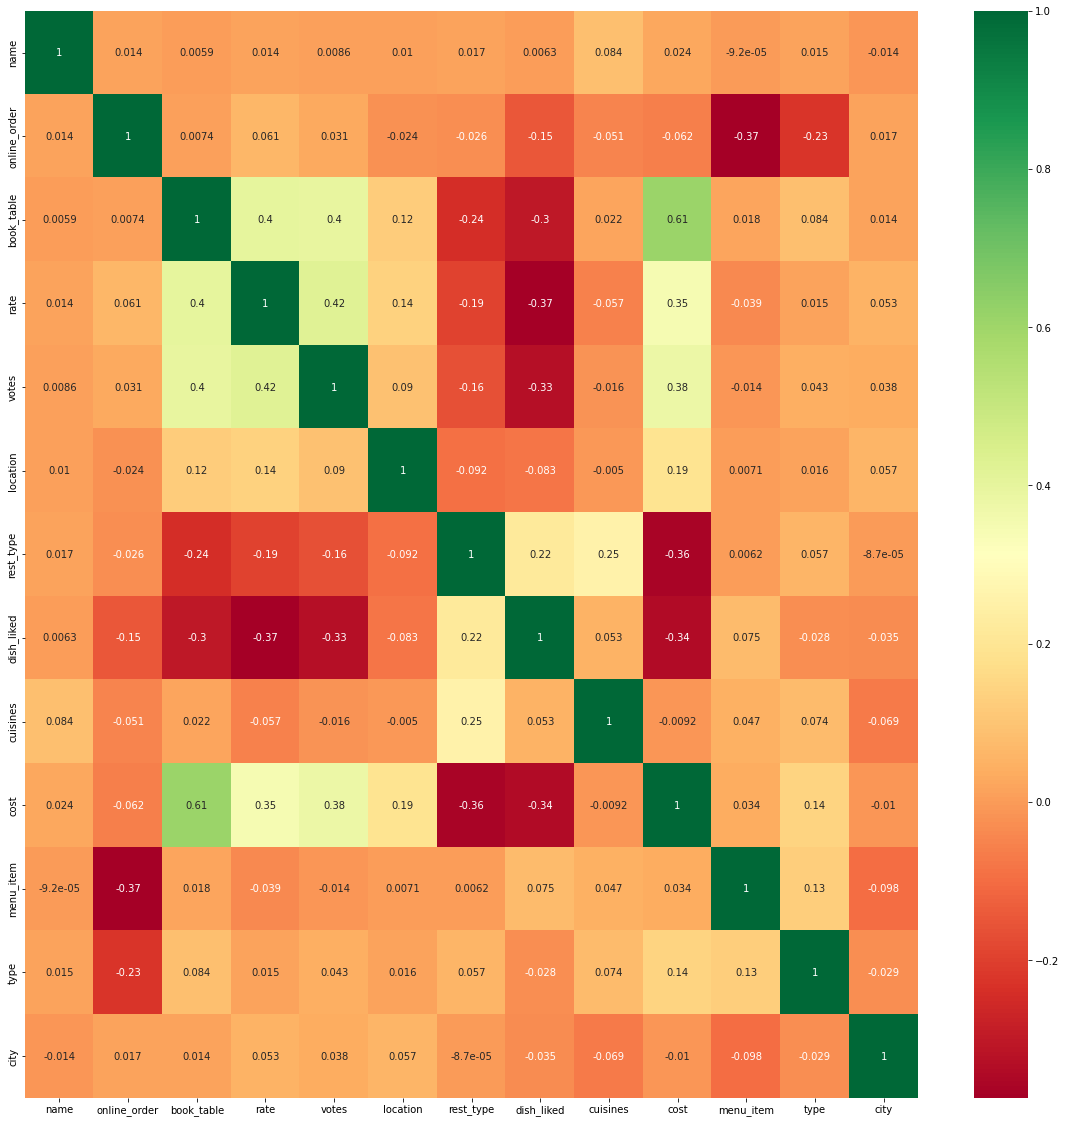

In [751]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [752]:
 df.drop(['type','menu_item','dish_liked','rest_type'],axis=1,inplace=True)

In [753]:
df.dtypes

name              int64
online_order      int64
book_table        int64
rate            float64
votes             int64
location          int64
cuisines          int64
cost            float64
city              int64
dtype: object

In [754]:
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
cuisines        0
cost            0
city            0
dtype: int64

In [755]:
df.head()

,name,online_order,book_table,rate,votes,location,cuisines,cost,city
0,3052,1,1,4.1,775,1,1002,800.0,1
1,5789,1,0,4.1,787,1,438,800.0,1
2,5367,1,0,3.8,918,1,360,800.0,1
3,171,0,0,3.7,88,1,1161,300.0,1
4,2455,0,0,3.8,166,4,1013,600.0,1


In [756]:
x=df.drop('rate',axis=1).values
y=df['rate'].values

In [757]:
y

array([4.1, 4.1, 3.8, ..., 3.5, 4. , 3.9])

In [758]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [759]:
x_train

array([[1.554e+03, 1.000e+00, 0.000e+00, ..., 2.640e+02, 7.000e+02,
        1.500e+01],
       [4.006e+03, 1.000e+00, 0.000e+00, ..., 1.153e+03, 2.000e+02,
        3.000e+00],
       [2.832e+03, 1.000e+00, 0.000e+00, ..., 1.990e+02, 6.000e+02,
        1.700e+01],
       ...,
       [4.785e+03, 1.000e+00, 1.000e+00, ..., 9.960e+02, 7.000e+02,
        5.000e+00],
       [4.350e+02, 0.000e+00, 0.000e+00, ..., 8.540e+02, 1.500e+02,
        7.000e+00],
       [5.430e+03, 0.000e+00, 0.000e+00, ..., 2.170e+02, 3.500e+02,
        1.800e+01]])

In [760]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_trains=sc.fit_transform(x_train)
x_tests=sc.transform(x_test)

In [761]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred

array([3.56891921, 3.62906183, 3.6697566 , ..., 3.65628876, 3.59022328,
       3.66385134])

In [762]:
 #mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
print('Mean Absolute error',mean_absolute_error(y_test,y_pred))
print('mean absolute error percentage',mean_absolute_percentage_error(y_test,y_pred))

Mean Absolute error 0.25227045482768734
mean absolute error percentage 0.07192896518869826


In [763]:

from sklearn.metrics import mean_squared_error
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.11244886632415438


In [764]:
import numpy as np
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,y_pred)))

Root mean squared error 0.3353339623780365


In [765]:
from sklearn.metrics import r2_score
Linear=r2_score(y_test,y_pred)
Linear

0.2561606604986856

In [769]:
#Hypertuning of parameters using Random search cv

In [770]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=1)

In [771]:
import numpy as np

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [600,800,1000,1200,1400,1600,2000,4000,4200]

max_features = ['auto', 'sqrt']

max_depth = [10,20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5, 10]

max_depth.append(None)

bootstrap = [True, False]

r_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,
              
              'min_samples_split': min_samples_split,
          
               'min_samples_leaf': min_samples_leaf,

               'bootstrap': bootstrap}



In [772]:


rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter=1, scoring='r2', cv = 3, verbose=2,  n_jobs=-1, return_train_score=True)

In [773]:
rfr_random.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [600, 800, 1000, 1200,
                                                         1400, 1600, 2000, 4000,
                                                         4200]},
                   return_train_score=True, scoring='r2', verbose=2)

In [774]:
rfr_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [775]:
from sklearn.ensemble import RandomForestRegressor
rff_model = RandomForestRegressor(n_estimators=600,min_samples_split= 10, min_samples_leaf= 2, max_features= 'auto',random_state=1, max_depth= None, bootstrap= True)
rff_model.fit(x_train,y_train)
y_predict = rff_model.predict(x_test)
r2_score(y_test,y_predict)

0.8758838704637643

In [776]:
from sklearn.metrics import r2_score
RFH=r2_score(y_test,y_predict)

**Extra Tree Regressor**

In [766]:
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators=200)
ETree.fit(x_train,y_train)
y_predictt=ETree.predict(x_test)
from sklearn.metrics import r2_score
Extratree=r2_score(y_test,y_predictt)
Extratree

0.9380805731511318

**Random Forest Regressor with out hypertuning**

In [767]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=800,random_state=1,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predictr=RForest.predict(x_test)
from sklearn.metrics import r2_score
RF_hyperout=r2_score(y_test,y_predictr)
RF_hyperout

0.8627574248424372

**Decision Tree Regressor**

In [768]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=1) 
regressor.fit(x_train,y_train)
y_predicttd=regressor.predict(x_test)
from sklearn.metrics import r2_score
Decision=r2_score(y_test,y_predicttd)
Decision



0.8738758652934263

In [777]:
scores=pd.DataFrame({'Models':['Extra Tree','Random Forest without Hypertuning','Random Forest with Hyper tuning','Decision Tree Regressor','Linear Regression'],'Scores':[Extratree,RF_hyperout,RFH,Decision,Linear]})

In [778]:
scores

,Models,Scores
0,Extra Tree,0.938081
1,Random Forest without Hypertuning,0.862757
2,Random Forest with Hyper tuning,0.875884
3,Decision Tree Regressor,0.873876
4,Linear Regression,0.256161


**EXtra Tree Regressor is having better score.**